In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import typing as tp

In [3]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
display(df)

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [5]:
N = 14
column = "Daily_Usage_Hours"
df[column]

0       4.0
1       5.5
2       5.8
3       3.1
4       2.5
       ... 
2995    3.9
2996    3.6
2997    3.2
2998    6.7
2999    3.5
Name: Daily_Usage_Hours, Length: 3000, dtype: float64

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [8]:
data = df[column]

mean_val = data.mean()
variance_val = data.var()
mode_val = data.mode()[0]
median_val = data.median()
quantile_1 = np.quantile(data, 0.25)
quantile_2 = np.quantile(data, 0.5)
quantile_3 = np.quantile(data, 0.75)
kurtosis = stats.kurtosis(data, fisher=True)
skewness = stats.skew(data)
interquartile_range  = stats.iqr(data)

print(f"Среднее: {mean_val}")
print(f"Дисперсия: {variance_val}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val}")
print(f"quantile_1: {quantile_1}, quantile_2: {quantile_2}, quantile_3: {quantile_3}")
print(f"Эксцесс: {kurtosis}")
print(f"Асимметрия: {skewness}")
print(f"IQR: {interquartile_range}")

Среднее: 5.020666666666667
Дисперсия: 3.8278955207291223
Мода: 4.4
Медиана: 5.0
quantile_1: 3.7, quantile_2: 5.0, quantile_3: 6.4
Эксцесс: -0.1226141759584718
Асимметрия: 0.016197292999157842
IQR: 2.7


Среднее и медиана почти совпадают, значит распределение близко к симметричному.
Асимметрия близка к нулю, значит значимой скошенности нет.
Эксцесс чуть меньше 0, значит распределение немного более «приплюснутое», чем нормальное.

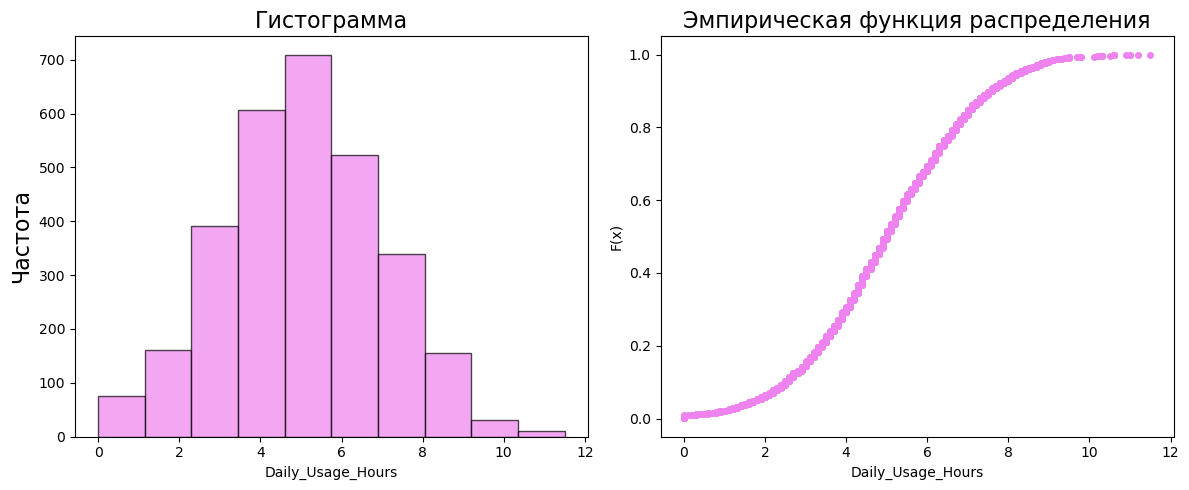

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=10, edgecolor='black', color='violet', alpha = 0.7)
plt.title("Гистограмма", fontsize = 16)
plt.xlabel(column)
plt.ylabel("Частота", fontsize = 16)

plt.subplot(1, 2, 2)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
plt.plot(sorted_data, ecdf, marker='o', linestyle='none', color='violet', markersize=4, )
plt.title("Эмпирическая функция распределения",  fontsize = 16)
plt.xlabel(column)
plt.ylabel("F(x)")

plt.tight_layout()
plt.show()

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

![Формулка из интернета](img1.png)


In [15]:
def chi_square_test_normality(data: tp.List[float], alpha: float = 0.05):
    data = np.array(data)
    data = data[~np.isnan(data)] 
    n = len(data)
    m = 1 + int(np.log2(n))
    bins = int(np.sqrt(n))
    hist, bin_edges = np.histogram(data, bins=bins)

    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)

    expected_probs = [
        stats.norm.cdf(bin_edges[i+1], mean_val, std_val) -
        stats.norm.cdf(bin_edges[i], mean_val, std_val)
        for i in range(bins)
    ]
    expected_counts = np.array(expected_probs) * n

    chi2_stat = np.sum((hist - expected_counts)**2 / (expected_counts + 1e-8))

    df = bins - 3  
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    result = p_value > alpha

    return chi2_stat, p_value


In [17]:
chi2_stat, p_value = chi_square_test_normality(df[column])
print(f"Chi-square statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}")

Chi-square statistic: 234.93, p-value: 0.0000


 p-value < 0.05, значит данные не подчиняются нормальному распределению

In [20]:
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data) 
print(f"Асимметрия: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

Асимметрия: 0.0162
Эксцесс: -0.1226


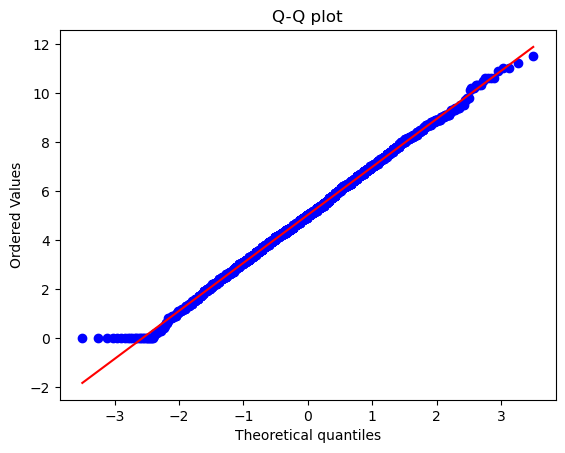

In [22]:
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

Q-Q plot показывает, что хвосты распределения отклоняются от прямой.

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

In [26]:
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

lower = Q1 - 1.5 * interquartile_range
upper = Q3 + 1.5 * interquartile_range

df_clean = df[column][(df[column] >= lower) & (df[column] <= upper)].to_frame()

In [28]:
df_clean['standardized'] = (df_clean[column] - df_clean[column].mean()) / df_clean[column].std()

In [30]:
df_clean['log_transformed'] = np.log1p(df_clean[column])

In [32]:
df_clean['full_standardized'] = (df_clean['log_transformed'] - df_clean['log_transformed'].mean()) / df_clean['log_transformed'].std()

In [34]:
df_clean

,Daily_Usage_Hours,standardized,log_transformed,full_standardized
0,4.0,-0.518643,1.609438,-0.305482
1,5.5,0.258412,1.871802,0.371178
2,5.8,0.413823,1.916923,0.487547
3,3.1,-0.984876,1.410987,-0.817304
4,2.5,-1.295698,1.252763,-1.225377
...,...,...,...,...
2995,3.9,-0.570447,1.589235,-0.357586
2996,3.6,-0.725858,1.526056,-0.520530
2997,3.2,-0.933072,1.435085,-0.755154
2998,6.7,0.880056,2.041220,0.808122


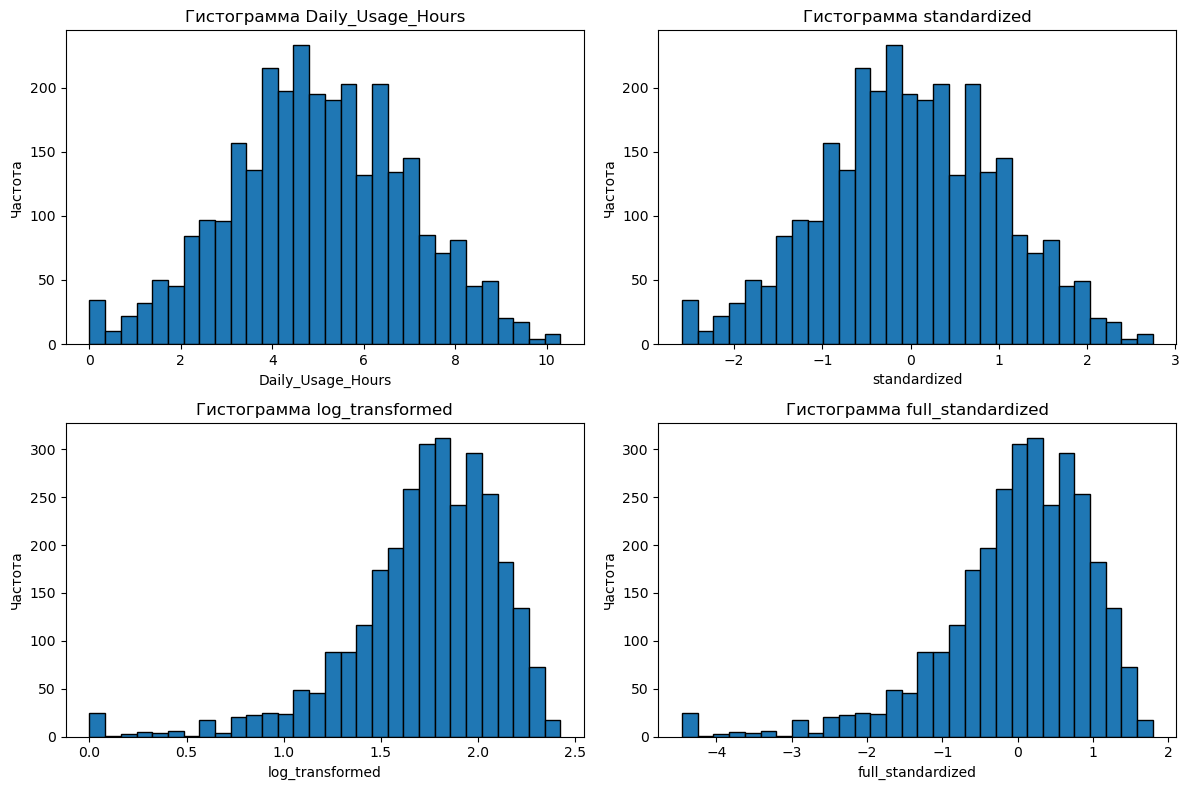

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten() 

columns = ['Daily_Usage_Hours',  'standardized', 'log_transformed', 'full_standardized']

for i, col in enumerate(columns):
    axes[i].hist(df_clean[col], bins=30, edgecolor='black')
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Исходное распределение Daily_Usage_Hours близко к симметричному, но имеет лёгкие отклонения от нормальности (сглаженные пики и хвосты). Стандартизация не меняет форму, а лишь приводит данные к единому масштабу, тогда как логарифмирование и последующая стандартизация делают распределение более асимметричным и не улучшают его приближение к нормальному. Таким образом, для дальнейшего анализа оптимально использовать исходные или просто стандартизованные данные

# Выполните пункты I и II для обработанных данных


In [40]:
data = df_clean[column]

mean_val = data.mean()
variance_val = data.var()
mode_val = data.mode()[0]
median_val = data.median()
quantile_1 = np.quantile(data, 0.25)
quantile_2 = np.quantile(data, 0.5)
quantile_3 = np.quantile(data, 0.75)
kurtosis = stats.kurtosis(data, fisher=True)
skewness = stats.skew(data)
interquartile_range  = stats.iqr(data)

print(f"Среднее: {mean_val}")
print(f"Дисперсия: {variance_val}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val}")
print(f"quantile_1: {quantile_1}, quantile_2: {quantile_2}, quantile_3: {quantile_3}")
print(f"Эксцесс: {kurtosis}")
print(f"Асимметрия: {skewness}")
print(f"IQR: {interquartile_range}")

Среднее: 5.001170568561873
Дисперсия: 3.726311777520931
Мода: 4.4
Медиана: 5.0
quantile_1: 3.7, quantile_2: 5.0, quantile_3: 6.3
Эксцесс: -0.2390768769235776
Асимметрия: -0.04571723053925987
IQR: 2.5999999999999996


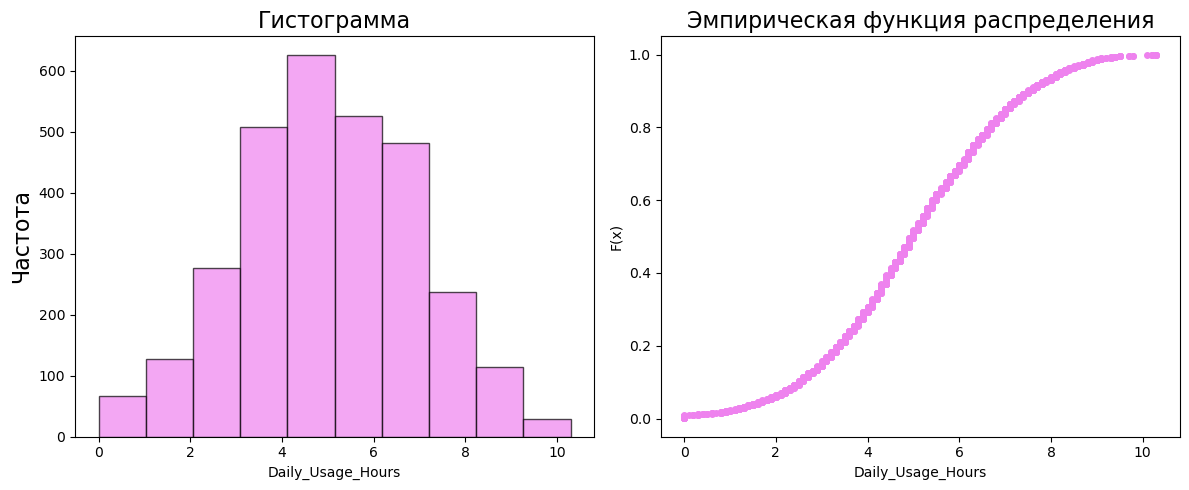

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=10, edgecolor='black', color='violet', alpha = 0.7)
plt.title("Гистограмма", fontsize = 16)
plt.xlabel(column)
plt.ylabel("Частота", fontsize = 16)

plt.subplot(1, 2, 2)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
plt.plot(sorted_data, ecdf, marker='o', linestyle='none', color='violet', markersize=4, )
plt.title("Эмпирическая функция распределения",  fontsize = 16)
plt.xlabel(column)
plt.ylabel("F(x)")

plt.tight_layout()
plt.show()

In [44]:
chi2_stat, p_value = chi_square_test_normality(data)
print(f"Chi-square statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}")

Chi-square statistic: 196.14, p-value: 0.0000


In [46]:
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data) 
print(f"Асимметрия: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

Асимметрия: -0.0457
Эксцесс: -0.2391


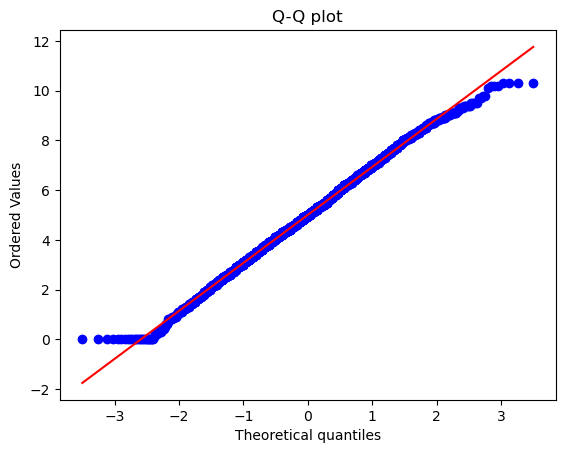

In [48]:
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

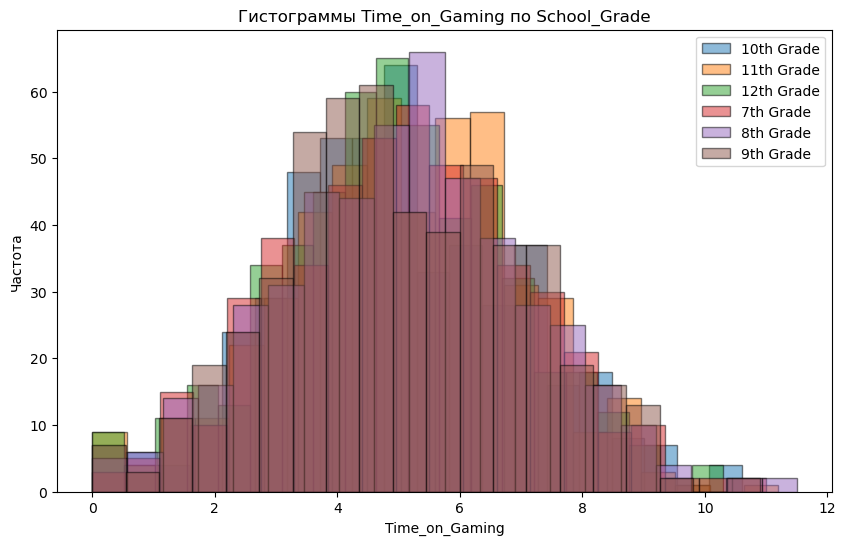

In [411]:
grouped = df.groupby('School_Grade')['Daily_Usage_Hours']
plt.figure(figsize=(10, 6))
for grade, data in grouped:
    plt.hist(data, bins=20, alpha=0.5, label=f'{grade} Grade', edgecolor='black')
plt.title("Гистограммы Time_on_Gaming по School_Grade")
plt.xlabel("Time_on_Gaming")
plt.ylabel("Частота")
plt.legend()
plt.show()

In [413]:
grouped_stats = df.groupby('School_Grade')['Time_on_Gaming'].agg(['mean', 'var','median', 'std', 'min', 'max'])
print(grouped_stats)

                  mean       var  median       std  min  max
School_Grade                                                
10th          1.453183  0.861384     1.4  0.928108  0.0  4.0
11th          1.512317  0.787609     1.5  0.887474  0.0  4.0
12th          1.520227  0.943851     1.5  0.971520  0.0  4.0
7th           1.554125  0.776682     1.6  0.881295  0.0  4.0
8th           1.538589  0.964953     1.5  0.982320  0.0  4.0
9th           1.569392  0.879880     1.5  0.938019  0.0  4.0


Средние значения по классам схожи, однако среднее значение для 10 класса выделяется на фоне остальных. Дисперсия варьируется в зависимости от класса. Распределения схожи

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'